# **🍽️ Restaurant Tips Analysis**

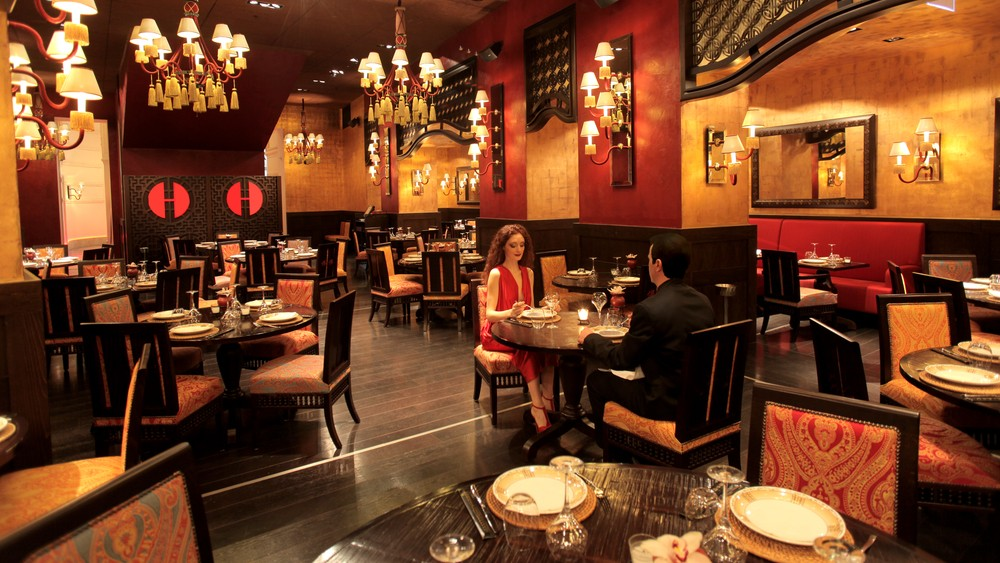

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [1]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [3]:
# PUT YOUR CODE HERE
df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

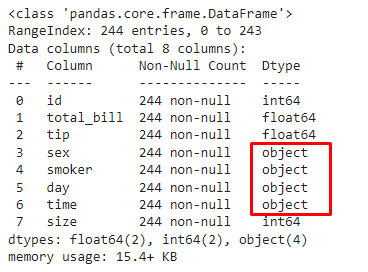

Let's fix their types and make them string:

In [5]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [4]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
95,95,40.17,4.73,Male,Yes,Fri,Dinner,4
174,174,16.82,4.0,Male,Yes,Sun,Dinner,2
224,224,13.42,1.58,Male,Yes,Fri,Lunch,2
186,186,20.9,3.5,Female,Yes,Sun,Dinner,3
63,63,18.29,3.76,Male,Yes,Sat,Dinner,4


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
1,1,10.34,1.66,Male,No,Sun,Dinner,3
148,148,9.78,1.73,Male,No,Thur,Lunch,2
27,27,12.69,2.0,Male,No,Sat,Dinner,2
0,0,16.99,1.01,Female,No,Sun,Dinner,2
51,51,10.29,2.6,Female,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [43]:
# YOUR CODE
common_tip_min = df.tip.min()
common_tip_max = df.tip.max()
common_tip_mean = df.tip.mean()
common_tip_median = df.tip.median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [44]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Insight 1: Smokers tend to tip slightly higher than non-smokers.
2. Insight 2: The mean and median between these two groups were not significantly different, suggesting that smoking was not the cause of the large difference in tipping.

**General conclusion:**

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

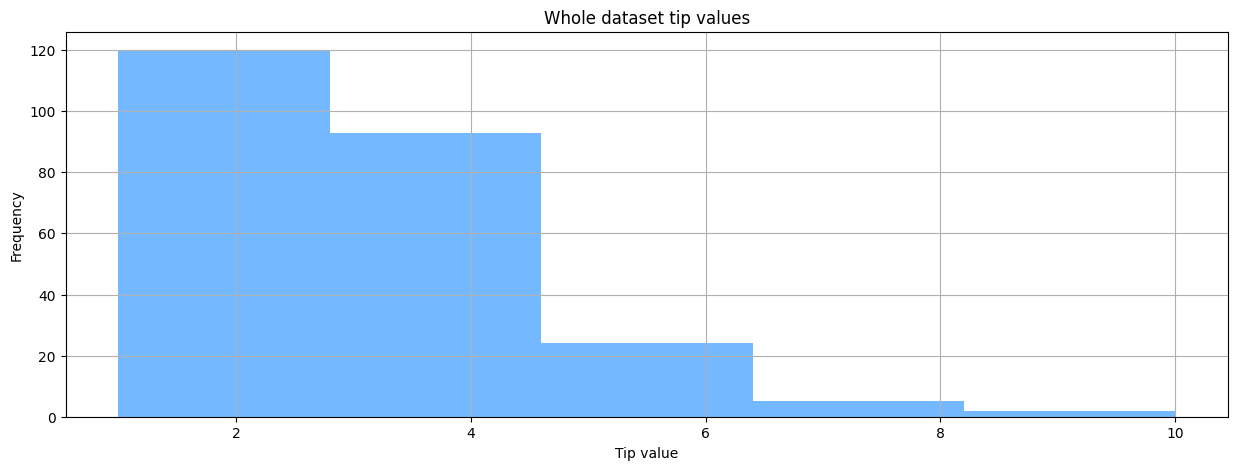

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, bins = 5, color = '#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

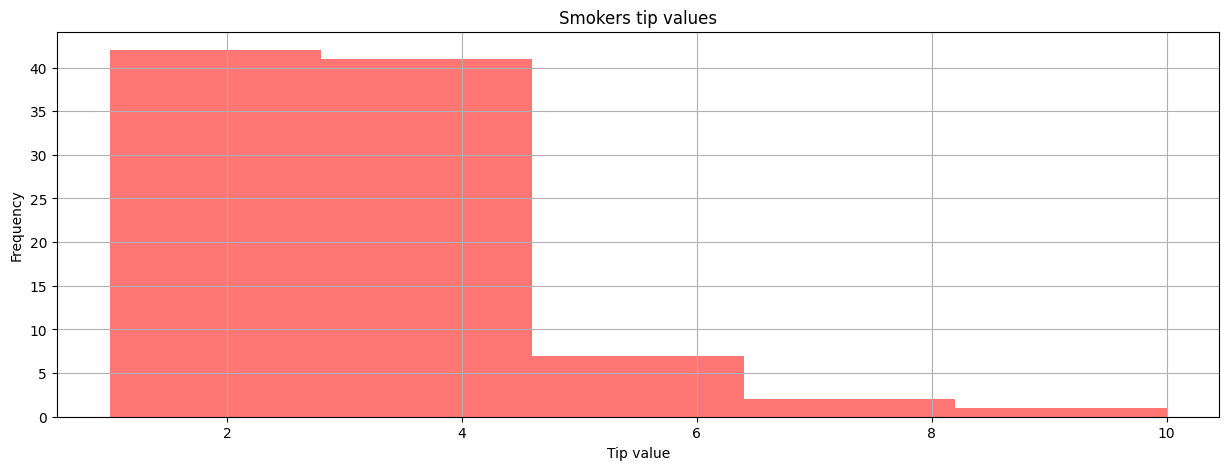

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], bins = 5, color = '#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

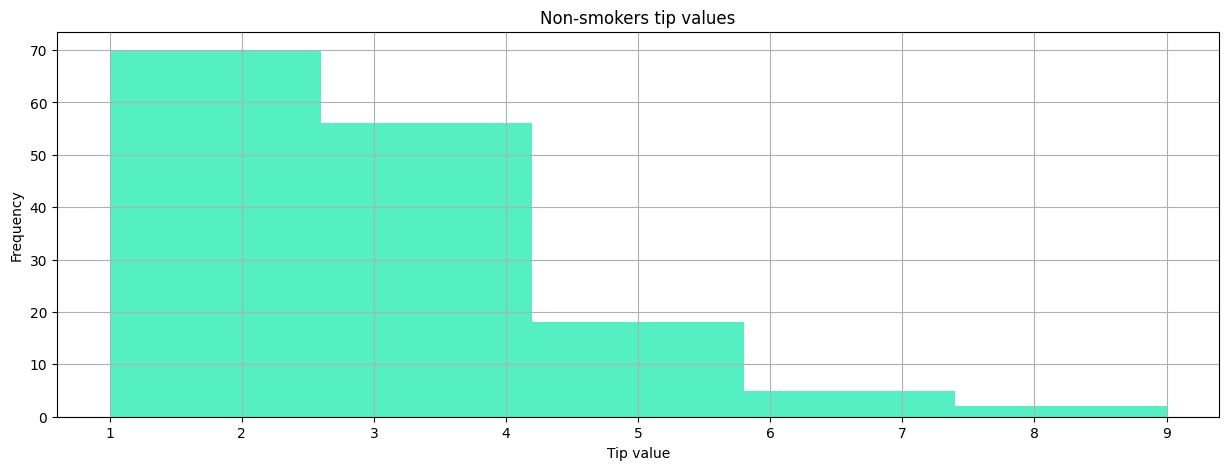

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], bins = 5, color = '#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

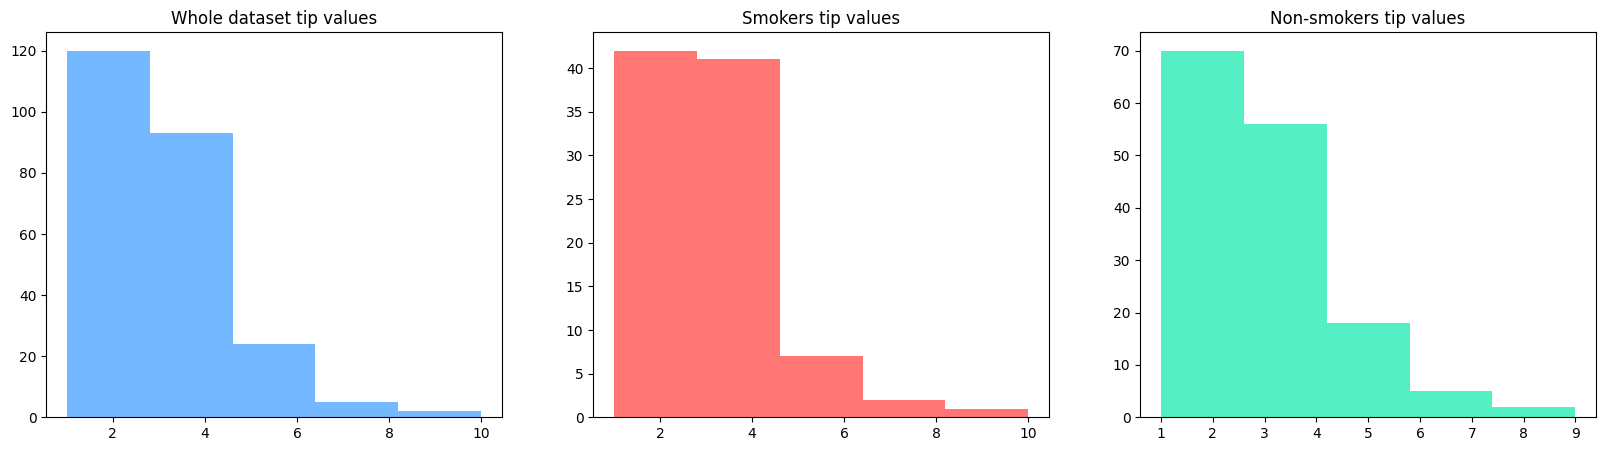

In [ ]:
# YOUR CODE
figure, axis = plt.subplots(1, 3, figsize=(20,5))

axis[0].hist(df.tip, bins=5, color = '#74b9ff')
axis[0].set_title('Whole dataset tip values')

axis[1].hist(smokers_df.tip, bins=5, color = '#ff7675')
axis[1].set_title('Smokers tip values')

axis[2].hist(non_smokers_df.tip, bins=5, color = '#55efc4')
axis[2].set_title('Non-smokers tip values')

plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Insight: Smokers tip more frequently and on average, the tip distribution ranges from 1 to 4, with some tips as high as 9, but very few.
Non-smokers tip higher but less frequently
**General conclusion:** Smokers with higher tips smoke more frequently and at an average level. Non-smokers tip higher but less frequently.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

Create a new dataframe `male_df` containing only info about smokers.
Check whether everything is okay. Output a test sample (5 random rows):

In [46]:
male_df = df[df['sex'] == 'Male']
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
220,220,12.16,2.2,Male,Yes,Fri,Lunch,2
40,40,16.04,2.24,Male,No,Sat,Dinner,3
194,194,16.58,4.0,Male,Yes,Thur,Lunch,2
171,171,15.81,3.16,Male,Yes,Sat,Dinner,2
23,23,39.42,7.58,Male,No,Sat,Dinner,4


Create a new dataframe `female_df` containing only info about smokers.
Check whether everything is okay. Output a test sample (5 random rows):

In [47]:
female_df = df[df['sex'] == 'Female']
female_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
209,209,12.76,2.23,Female,Yes,Sat,Dinner,2
37,37,16.93,3.07,Female,No,Sat,Dinner,3
94,94,22.75,3.25,Female,No,Fri,Dinner,2
33,33,20.69,2.45,Female,No,Sat,Dinner,4
243,243,18.78,3.0,Female,No,Thur,Dinner,2


####**Male tips compare**

In [48]:
Male_tip_min = male_df['tip'].min()
Male_tip_max = male_df['tip'].max()
Male_tip_mean = male_df['tip'].mean()
Male_tip_median = male_df['tip'].median()

In [49]:
# Make a list of values
Male_tip_values = [Male_tip_min, Male_tip_max, Male_tip_mean, Male_tip_median]
# Round all the values to 4 decimal places
Male_tip_values = map(lambda x: round(x, 4), Male_tip_values)

# Make a dataframe from the list
Male_tip_mct = pd.DataFrame(Male_tip_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
Male_tip_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


####**Female tips compare**

In [50]:
Female_tip_min = female_df['tip'].min()
Female_tip_max = female_df['tip'].max()
Female_tip_mean = female_df['tip'].mean()
Female_tip_median = female_df['tip'].median()


In [51]:
# Make a list of values
Female_tip_values = [Female_tip_min, Female_tip_max, Female_tip_mean, Female_tip_median]
# Round all the values to 4 decimal places
Female_tip_values = map(lambda x: round(x, 4), Female_tip_values)

# Make a dataframe from the list
Female_tip_mct = pd.DataFrame(Female_tip_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
Female_tip_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **📝 Conclusion**

In [53]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Male': {'min': Male_tip_min, 'max': Male_tip_max, 'mean': Male_tip_mean, 'median': Male_tip_median},
    'Felmale': {'min': Female_tip_min, 'max': Female_tip_max, 'mean': Female_tip_mean, 'median': Female_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Male,Felmale
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


**Insights based on measures of central tendency comparison:**

1. Insight 1: Men have a maximum tip of 10.00, while women have a maximum of 6.50. Men receive higher tips than women.
2. Insight 2: Men's tips are high at both the maximum and average levels. Men are satisfied with the quality of service or the quality of service at the restaurant.

**General conclusion:**

####**Look at histograms**

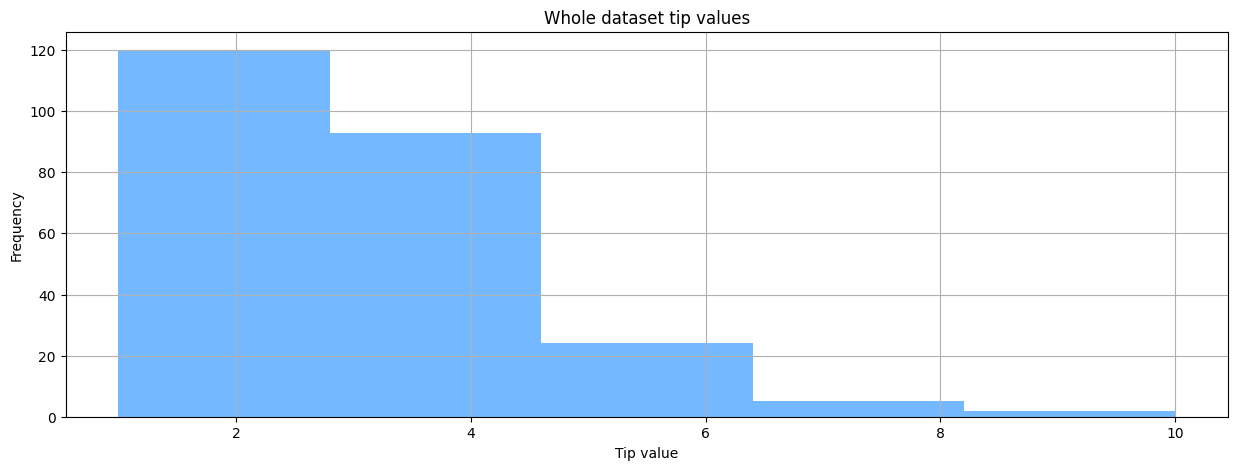

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, bins = 5, color = '#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

####**Male tips histogram**

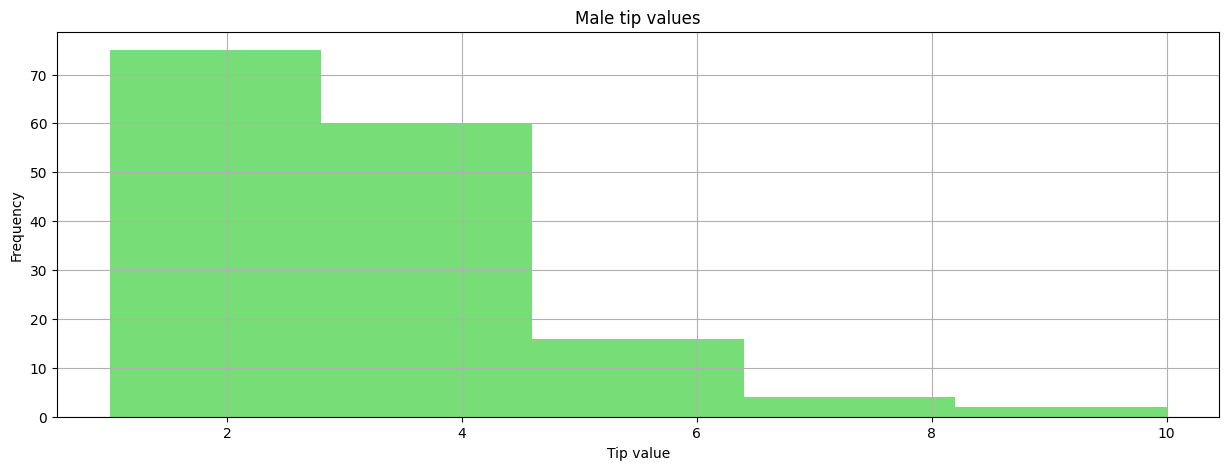

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(male_df['tip'], bins = 5, color = '#77dd77')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Male tip values')
plt.grid(True)
plt.show()

####**Female tips histogram**

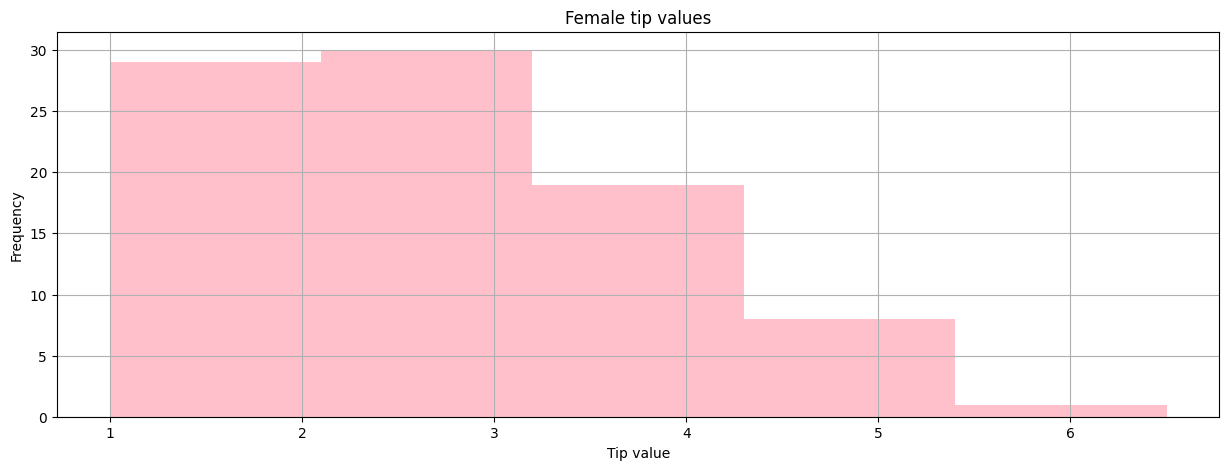

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(female_df['tip'], bins = 5, color = '#ffc0cb')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Female tip values')
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

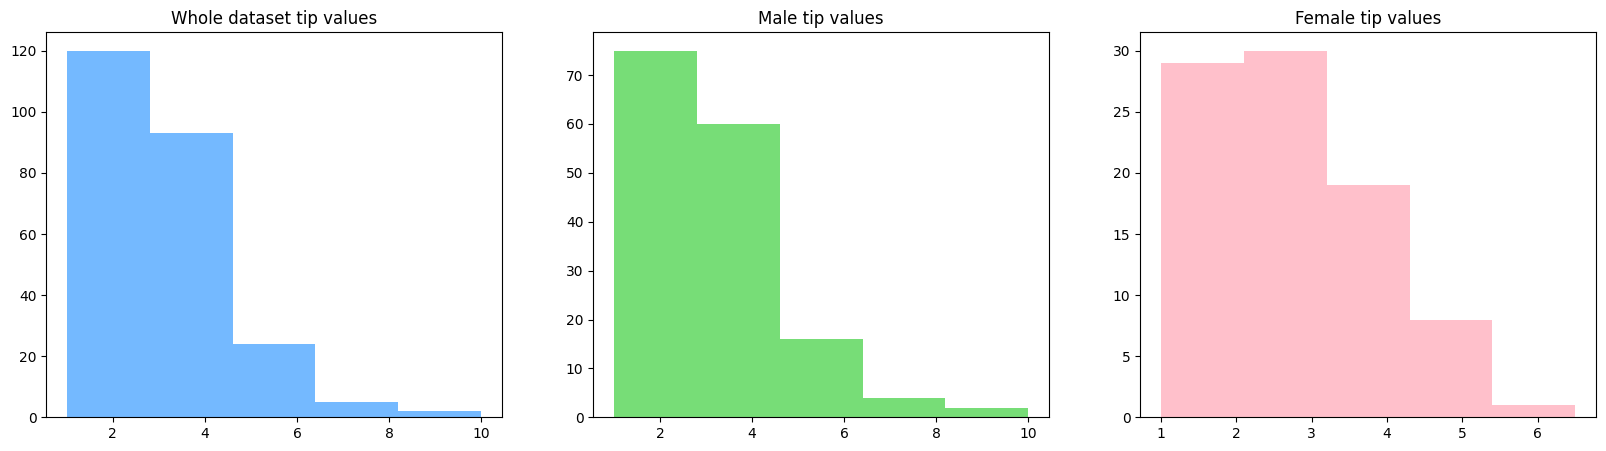

In [19]:
# YOUR CODE
figure, axis = plt.subplots(1, 3, figsize=(20,5))

axis[0].hist(df.tip, bins=5, color = '#74b9ff')
axis[0].set_title('Whole dataset tip values')

axis[1].hist(male_df.tip, bins=5, color = '#77dd77')
axis[1].set_title('Male tip values')

axis[2].hist(female_df.tip, bins=5, color = '#ffc0cb')
axis[2].set_title('Female tip values')

plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

Men tip more frequently and at a higher rate, while women tip in the middle. Gender may be a factor in tipping differences and include how customers rate service, communication, or other personal factors.
---

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

####**Separate weekdays and weekends**

Create a list of weekends and weekdays

In [31]:
weekend_days = ['Sat', 'Sun']
weekday_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

**Create tow new dataframes 'weeken_tip' and weekday_tip**

In [32]:
weekend_tip = df[df['day'].isin(weekend_days)]['tip']
weeken_tip.sample(5)

,tip
168,1.61
210,2.0
179,3.55
28,4.3
213,2.5


In [19]:
weekday_tip = df[df['day'].isin(weekday_days)]['tip']
weekday_tip.sample(5)

,tip
225,2.5
100,2.5
226,2.0
99,1.5
91,3.5


####**Average tips for weekdays and weekends**

In [65]:
avg_weekend_tip = weekend_tip.mean()
print(avg_weekend_tip)

3.115276073619632


In [21]:
avg_weekday_tip = weekday_tip.mean()
print(avg_weekday_tip)

2.7347368421052627


**Insight** : Customers tend to leave more tips on weekends than on weekdays.

####**Look at histograms**

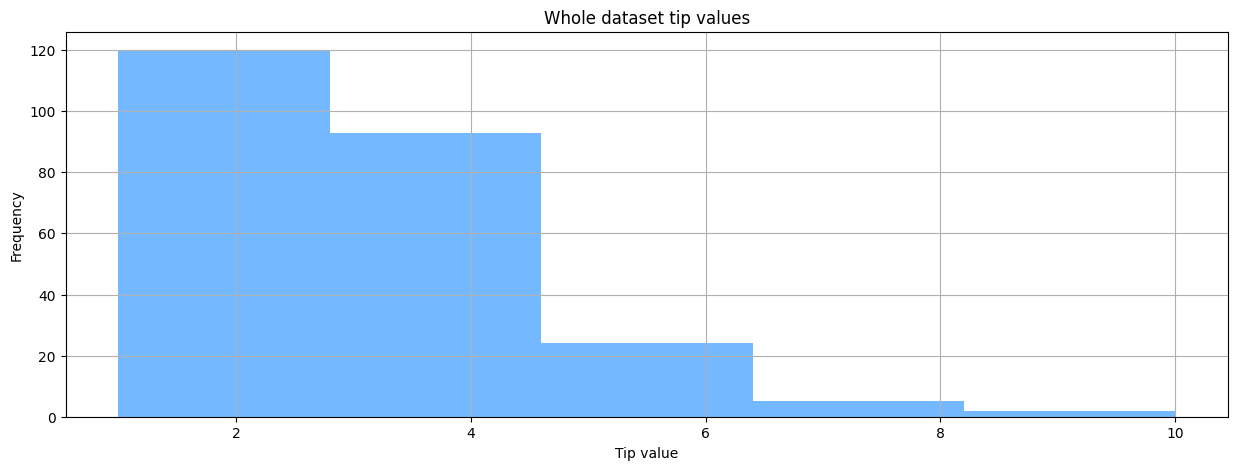

In [23]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, bins = 5, color = '#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

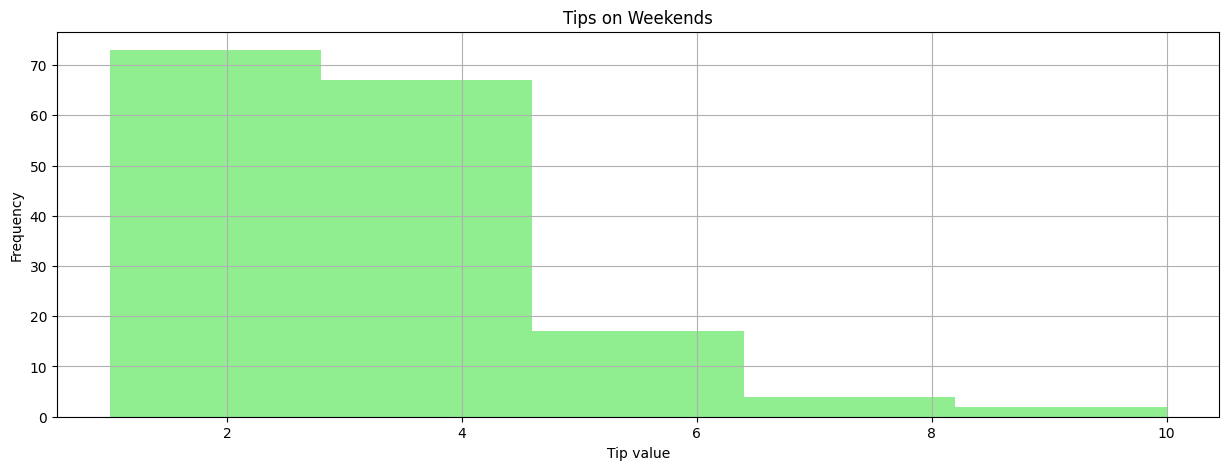

In [39]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(weekend_tip, bins = 5, color = 'lightgreen')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Tips on Weekends')
plt.grid(True)
plt.show()

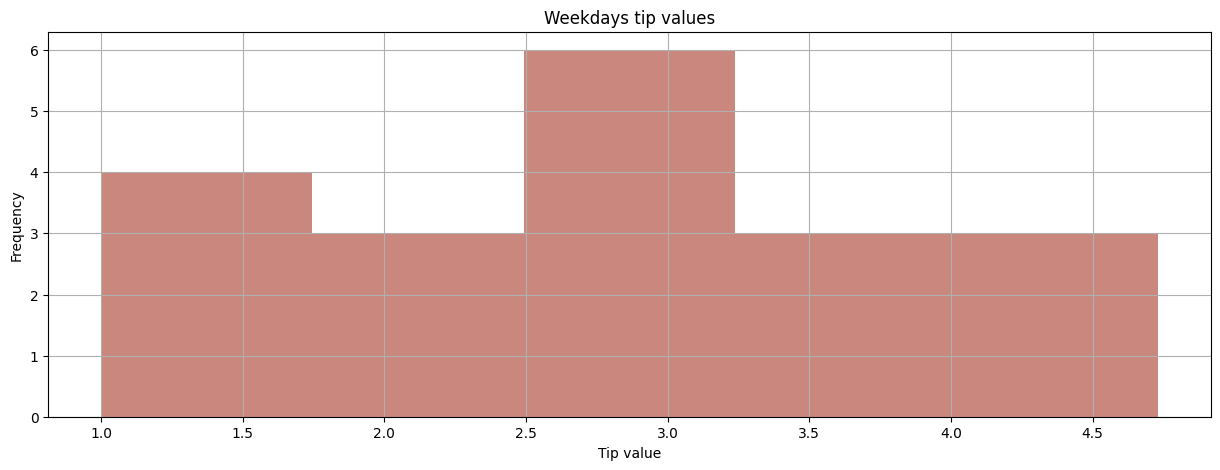

In [37]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(weekday_tip, bins = 5, color = '#CA877E')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Tips on Weekdays')
plt.grid(True)
plt.show()

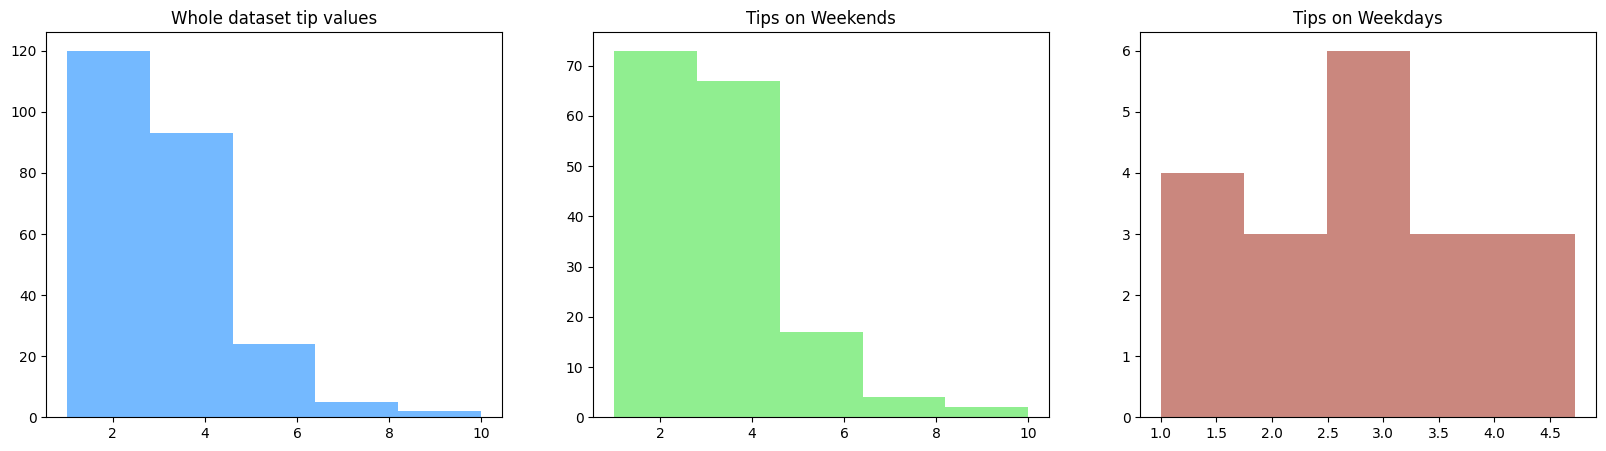

In [41]:
# YOUR CODE
figure, axis = plt.subplots(1, 3, figsize=(20,5))

axis[0].hist(df.tip, bins=5, color = '#74b9ff')
axis[0].set_title('Whole dataset tip values')

axis[1].hist(weekend_tip, bins=5, color = 'lightgreen')
axis[1].set_title('Tips on Weekends')

axis[2].hist(weekday_tip, bins=5, color = '#CA877E')
axis[2].set_title('Tips on Weekdays')

plt.show()

**Insights based on distribution comparison:**


---



### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

First we check how many variables there are

In [58]:
df['time'].unique()

<StringArray>
['Dinner', 'Lunch']
Length: 2, dtype: string

Create another one dataframe `dinner_tip` containing only non-smokers.


In [59]:
dinner_tip = df[df['time'] == 'Dinner']

Check whether everything is okay. Output a test sample (5 random rows):

In [60]:
dinner_tip.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
41,41,17.46,2.54,Male,No,Sun,Dinner,2
38,38,18.69,2.31,Male,No,Sat,Dinner,3
101,101,15.38,3.0,Female,Yes,Fri,Dinner,2
114,114,25.71,4.0,Female,No,Sun,Dinner,3
73,73,25.28,5.0,Female,Yes,Sat,Dinner,2


Create another one dataframe `lunch_tip` containing only non-smokers.

In [61]:
lunch_tip = df[df['time'] == 'Lunch']

Check whether everything is okay. Output a test sample (5 random rows):

In [62]:
lunch_tip.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
132,132,11.17,1.5,Female,No,Thur,Lunch,2
222,222,8.58,1.92,Male,Yes,Fri,Lunch,1
203,203,16.4,2.5,Female,Yes,Thur,Lunch,2
125,125,29.8,4.2,Female,No,Thur,Lunch,6
140,140,17.47,3.5,Female,No,Thur,Lunch,2


####**Compare their measures of central tendency**

####**Dinner**

In [67]:
dinner_tip_min = dinner_tip['tip'].min()
dinner_tip_max = dinner_tip['tip'].max()
dinner_tip_mean = dinner_tip['tip'].mean()
dinner_tip_median = dinner_tip['tip'].median()

In [68]:
# YOUR CODE
# Make a list of values
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
# Round all the values to 4 decimal places
dinner_values = map(lambda x: round(x, 4), dinner_values)

# Make a dataframe from the list
dinner_mct = pd.DataFrame(dinner_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinner_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


####**Lunch**

In [63]:
# YOUR CODE
lunch_tip_min = lunch_tip['tip'].min()
lunch_tip_max = lunch_tip['tip'].max()
lunch_tip_mean = lunch_tip['tip'].mean()
lunch_tip_median = lunch_tip['tip'].median()

In [66]:
# YOUR CODE
# Make a list of values
lunch_values = [lunch_tip_min, lunch_tip_max, lunch_tip_mean, lunch_tip_median]
# Round all the values to 4 decimal places
lunch_values = map(lambda x: round(x, 4), lunch_values)

# Make a dataframe from the list
lunch_mct = pd.DataFrame(lunch_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
lunch_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


##### **📝 Conclusion**

In [70]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinner': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Lunch': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Dinner,Lunch
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


**Insights based on measures of central tendency comparison:**

Insight 1: Customers tend to leave higher tips at dinners more often.

**General conclusion:** Customers tend to leave higher tips at dinners more often. This may depend on the type of meal, quality of service and customer satisfaction.

####**Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

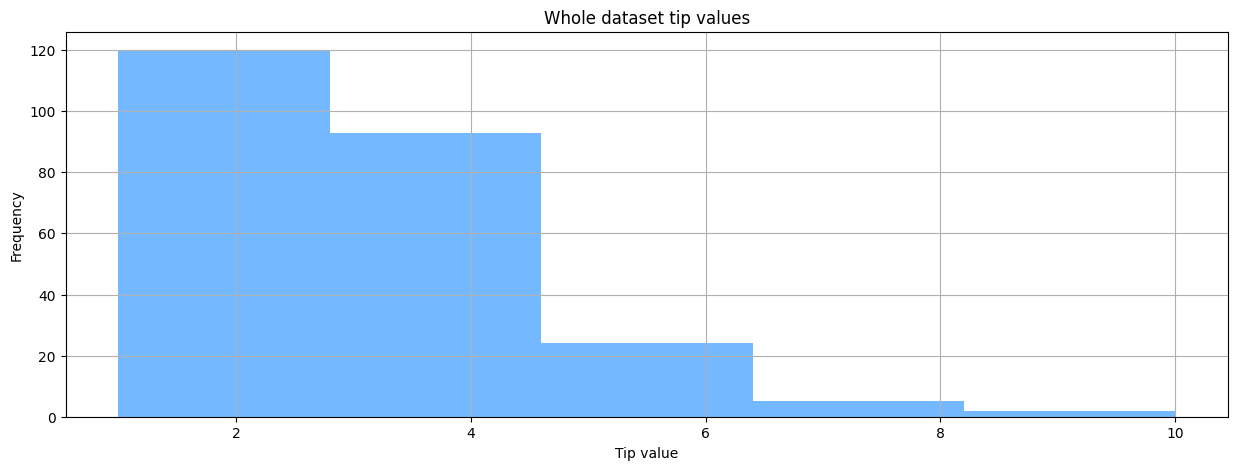

In [71]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df.tip, bins = 5, color = '#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

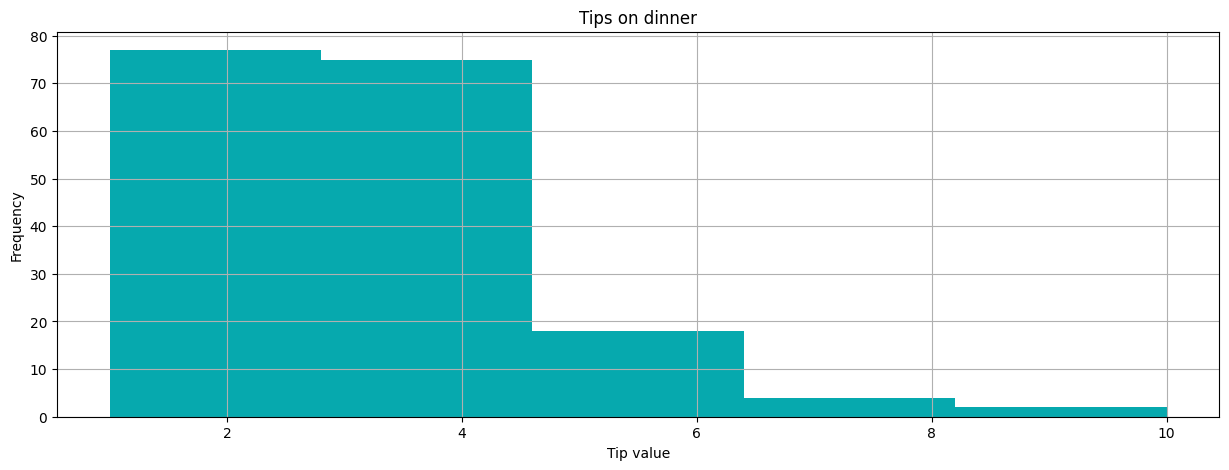

In [72]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(dinner_tip['tip'], bins = 5, color = '#06A9AE')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Tips on dinner')
plt.grid(True)
plt.show()

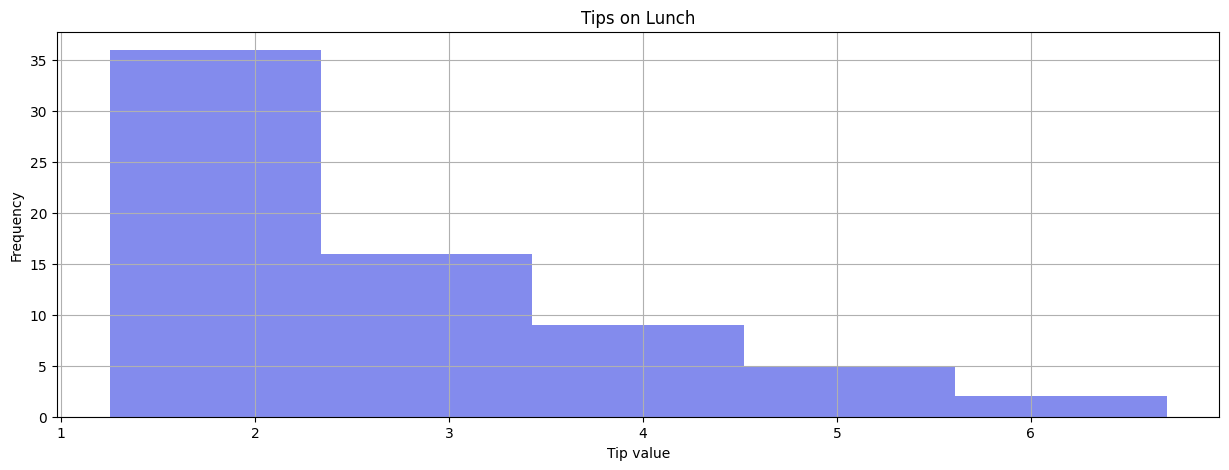

In [73]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(lunch_tip['tip'], bins = 5, color = '#838BED')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Tips on Lunch')
plt.grid(True)
plt.show()

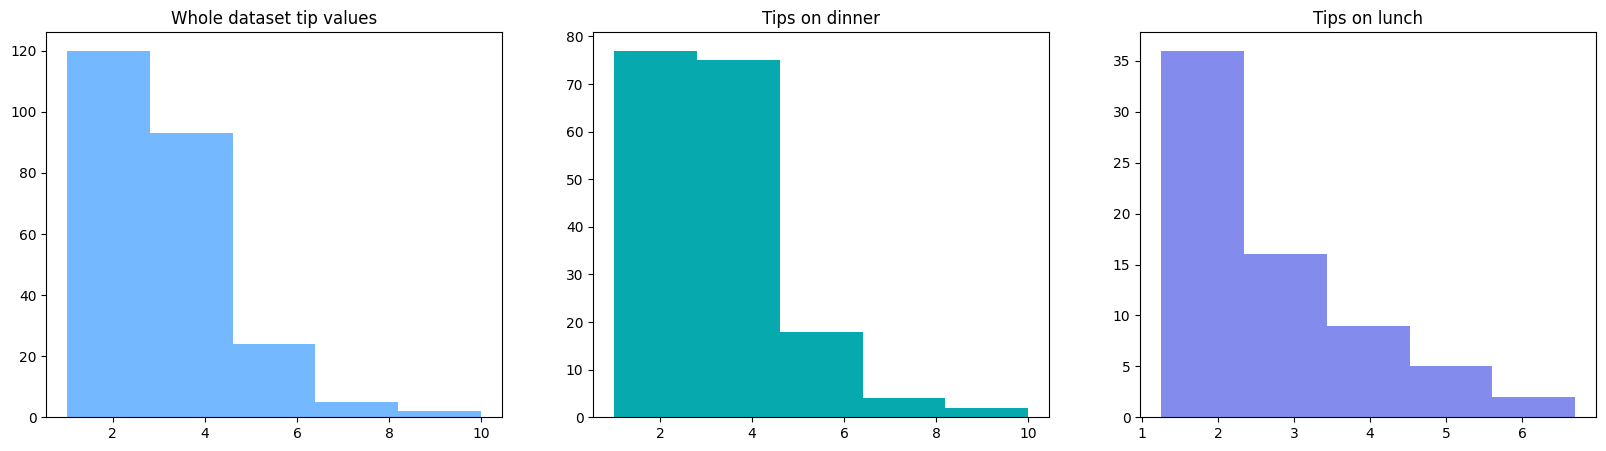

In [74]:
# YOUR CODE
figure, axis = plt.subplots(1, 3, figsize=(20,5))

axis[0].hist(df.tip, bins=5, color = '#74b9ff')
axis[0].set_title('Whole dataset tip values')

axis[1].hist(dinner_tip.tip, bins=5, color = '#06A9AE')
axis[1].set_title('Tips on dinner')

axis[2].hist(lunch_tip.tip, bins=5, color = '#838BED')
axis[2].set_title('Tips on lunch')

plt.show()

##### **📝 Conclusion**

Insights based on distribution comparison:
Dinner diners tend to leave larger tips than lunch diners, and the tips are higher.
Lunch tips are low and frequent

---
